In [1]:
import torch
from utils.training import train_accuracy
import matplotlib.pyplot as plt
from os import listdir
from tqdm import tqdm, trange
from data_loaders.imagenet import Train, Val
import numpy as np
from utils.pruning import get_prune_percentage

In [2]:
def rule(x):
    a = x[10:-4]
    try: return int(a)
    except: return 0
base_dir = "saved_models/RN18_64_2"
all_models = listdir(base_dir)
real_models = sorted([m for m in all_models if m.startswith("real")], key = rule)
quat_models = sorted([m for m in all_models if m.startswith("quat")], key = rule)
print(f"{real_models = }\n{quat_models = }")

real_models = ['real_unpruned.pth', 'real_prune1.pth', 'real_prune2.pth', 'real_prune3.pth', 'real_prune4.pth', 'real_prune5.pth', 'real_prune6.pth', 'real_prune7.pth', 'real_prune8.pth', 'real_prune9.pth', 'real_prune10.pth', 'real_prune11.pth', 'real_prune12.pth', 'real_prune13.pth', 'real_prune14.pth', 'real_prune15.pth', 'real_prune16.pth']
quat_models = ['quat_unpruned.pth', 'quat_prune1.pth', 'quat_prune2.pth', 'quat_prune3.pth', 'quat_prune4.pth', 'quat_prune5.pth', 'quat_prune6.pth', 'quat_prune7.pth', 'quat_prune8.pth', 'quat_prune9.pth', 'quat_prune10.pth', 'quat_prune11.pth', 'quat_prune12.pth', 'quat_prune13.pth', 'quat_prune14.pth', 'quat_prune15.pth', 'quat_prune16.pth']


In [3]:
# training_generator = torch.utils.data.DataLoader(Train(), batch_size=256, num_workers=4)
validation_generator = torch.utils.data.DataLoader(Val(), batch_size=1024, num_workers=4)
GPU = torch.device("cuda:0")

In [4]:
get_prune_percentage(torch.load(f"{base_dir}/{real_models[0]}"))

1.0

In [5]:
# real_train_accs = []
real_test_accs = []
real_prune_percs = []
for model_name in tqdm(real_models, desc="Real models", unit="model"):
    model = torch.load(f"{base_dir}/{model_name}")
    real_prune_percs.append(get_prune_percentage(model)*100)
    # real_train_accs.append(train_accuracy(model, training_generator, GPU, 100))
    real_test_accs.append(train_accuracy(model, validation_generator, GPU))

# quat_train_accs = []
quat_test_accs = []
quat_prune_percs = []
for model_name in tqdm(quat_models, desc="Quat models", unit="model"):
    model = torch.load(f"{base_dir}/{model_name}")
    quat_prune_percs.append(get_prune_percentage(model)*25)
    # quat_train_accs.append(train_accuracy(model, training_generator, GPU, 100))
    quat_test_accs.append(train_accuracy(model, validation_generator, GPU))

Quat models:   0%|          | 0/17 [00:00<?, ?model/s]/home/aritra/project/quatLT23/htorch/layers.py:591: UserWarning: torch.cholesky is deprecated in favor of torch.linalg.cholesky and will be removed in a future PyTorch release.
L = torch.cholesky(A)
should be replaced with
L = torch.linalg.cholesky(A)
and
U = torch.cholesky(A, upper=True)
should be replaced with
U = torch.linalg.cholesky(A).mH().
This transform will produce equivalent results for all valid (symmetric positive definite) inputs. (Triggered internally at ../aten/src/ATen/native/BatchLinearAlgebra.cpp:1691.)
  ell = torch.cholesky(cov + self.eye, upper=True)
/home/aritra/project/quatLT23/htorch/layers.py:592: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = 

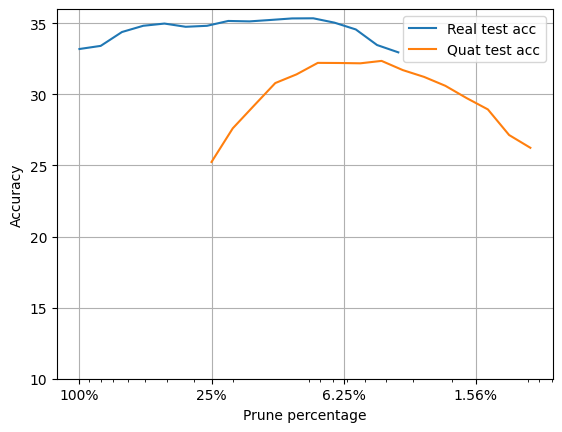

In [7]:
plt.plot(real_prune_percs[:-1], real_test_accs[:-1], label="Real test acc")
plt.plot(quat_prune_percs[:-1], quat_test_accs[:-1], label="Quat test acc")

plt.xscale("log")
plt.legend()
plt.xlabel("Prune percentage")
plt.ylabel("Accuracy")
plt.gca().invert_xaxis()
# plt.xticks([0.25, 1, 5,  25, 100], ["0.25%", "1%", "5%", "25%", "100%"])
plt.xticks([0.39, 1.56, 6.25,  25, 100], ["0.39%", "1.56%", "6.25%", "25%", "100%"])
plt.ylim(10, 36)
plt.grid()

In [ ]:
# https://arxiv.org/pdf/2301.04623.pdf
# https://openreview.net/pdf?id=K398CuAKVKB